In [1]:

# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import warnings

# https://docs.python.org/3/library/warnings.html#warnings.filterwarnings
# "ignore" never print matching warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset into a DataFrame
data = pd.read_csv('data/winequality-red.csv')
display(data.head())
display(data.shape)

# there are 1599 datapoints and 11 features, we need to predict 'quality'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

In [3]:
# Display info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check for missing values
data.isna().sum()

# there are no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Remove duplicate data

# in the given lab sheet, "inplace=True" was not set. 
# Therefore the duplicates were not really dropped.
# Other solution is to assign it backto data variable
data.drop_duplicates(keep='first', inplace=True)

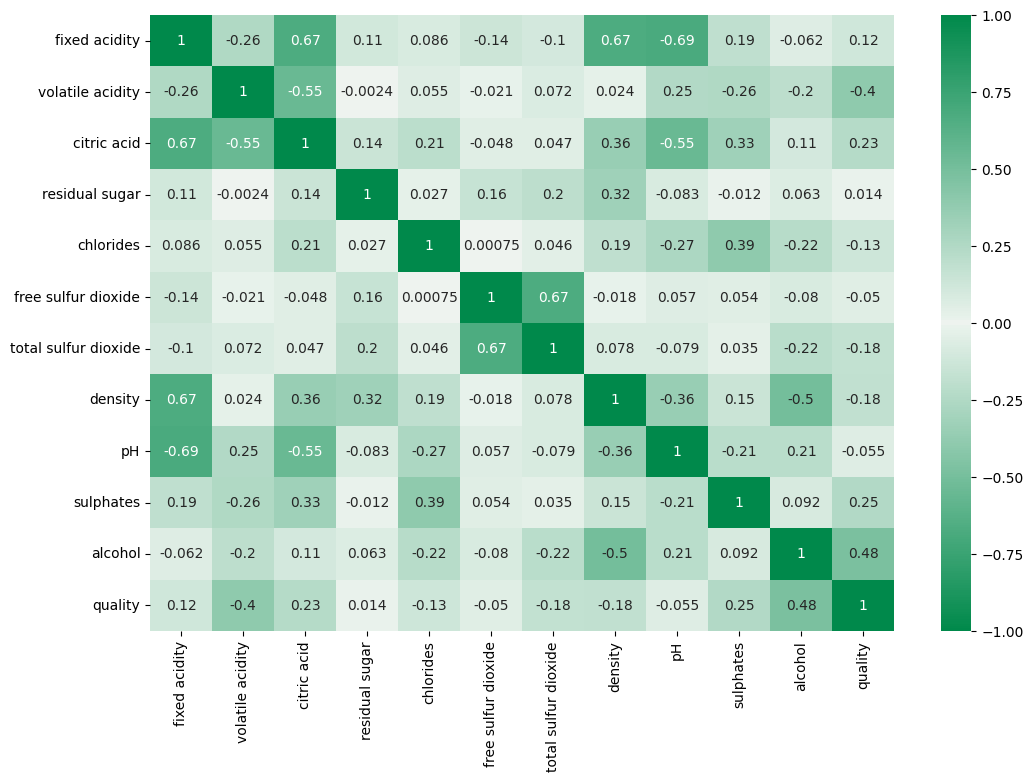

In [6]:
# Correlation matrix
# Calculate the correlation matrix
# returns the coreleation as a matrix of featureCount*featureCount
# values range from -1 to +1 in each cell. 
# -1 and +1 a highly correlated. 0 is not correlated.
# valus between them scale linearly. (correlated a bit, a bit more....)
corr_matrix = data.corr()

plt.figure(figsize=(12, 8), dpi=100)

# changed the colour palette so that -1 and +1 are the same dark colour. easier to see which
# features are correlated
colourPalette  = sns.diverging_palette(500, 500, s=100, as_cmap=True)

# set the vmin and vmax to -1 and +1 to adjust the colours properly
sns.heatmap(corr_matrix, center=0, cmap=colourPalette,annot=True,vmin=-1, vmax=1)

# plt.savefig("figures/correlation_matrix.png", dpi=300)
plt.show()

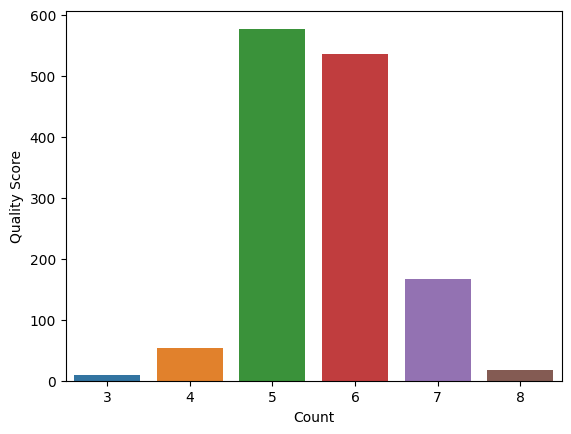

In [7]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x='quality')
plt.xlabel('Count')
plt.ylabel('Quality Score')
# plt.savefig("figures/wine_quality_distribution.png", dpi=300)
plt.show()


In [8]:
# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

# Display dataframe
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


([<matplotlib.axis.XTick at 0x2847e9f0250>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

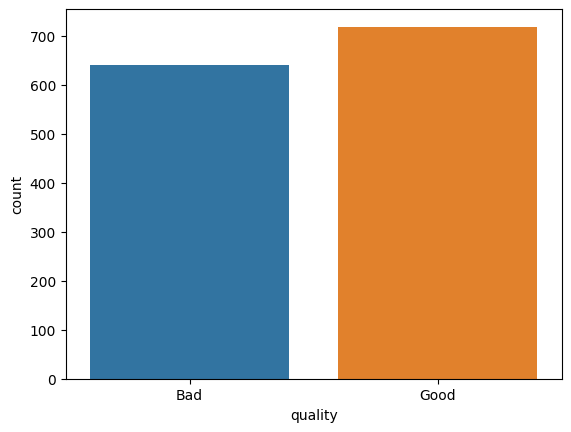

In [9]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x='quality')
plt.xticks([0, 1], ['Bad', 'Good'])

In [10]:
# Get distinc count of quality
quality_count = data['quality'].value_counts()
quality_count

# this is a good dataset that has almost equal values of the two classes

quality
1    719
0    640
Name: count, dtype: int64

In [11]:
# Drop the target variable
X = data.drop('quality', axis=1)
display(X.head())

# Set the target variable as the label
y = data['quality']
display(y.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

In [12]:
# Display shape
print(X.shape)
print(y.shape)

(1359, 11)
(1359,)


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 7 features using SelectKBest
kbest = SelectKBest(score_func=f_classif, k=7)
X_new = kbest.fit_transform(X, y)

# Print the selected features
print(X.columns[kbest.get_support()])

# Reassign the selected features to X
X = X[X.columns[kbest.get_support()]]

Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets (80% training, 20% testing)
# random_state to make sure that every run gets the same train test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# ---------------------------------------
# from the doc

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# In the multiclass case, the training algorithm uses the one-vs-rest 
# (OvR) scheme if the 'multi_class' option is set to 'ovr', and uses the
# cross-entropy loss if the 'multi_class' option is set to 'multinomial'. 
# (Currently the 'multinomial' option is supported only by the 'lbfgs', 'sag'
#  , 'saga' and 'newton-cg' solvers.)


# means this can be used for multiclass tooo ? we could have kept the quality values
# as is and done this then?
# ---------------------------------------


# Create an instance of the logistic regression model
logreg_model = LogisticRegression()
parameters = {
    "C" : [-1,1,2,3,5,10,15,20,25,30],
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "max_iter" : [1,1,100,1000,10000]
}

# tries out all the hyperparamters in the 'parameters' variable. Takes a long time to complete
# logreg_model = GridSearchCV(logreg_model, parameters,verbose=True, scoring='accuracy')

# Fit the model to the training data
logreg_model.fit(X_train, y_train)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [-1, 1, 2, 3, 5, 10, 15, 20, 25, 30],
                         'max_iter': [1, 1, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=True)

In [16]:
logreg_model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

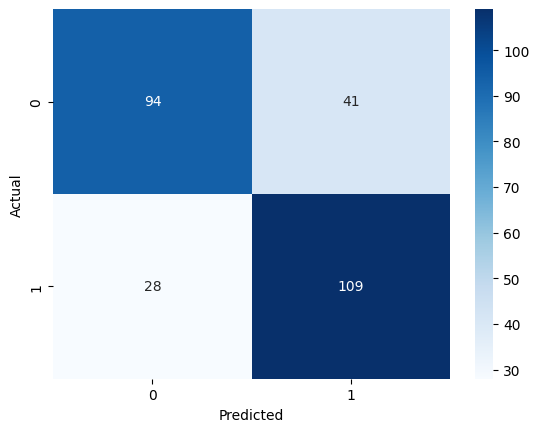

In [17]:
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Create confusion matrix
# shows how the model predicted the values.
# TP FP, TN FN 
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig("figures/confusion_matrix.png", dpi=300)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the accuracy of the model
# ratio of the values that the model got right
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7463235294117647
Precision: 0.7266666666666667
Recall: 0.7956204379562044
F1 score: 0.759581881533101


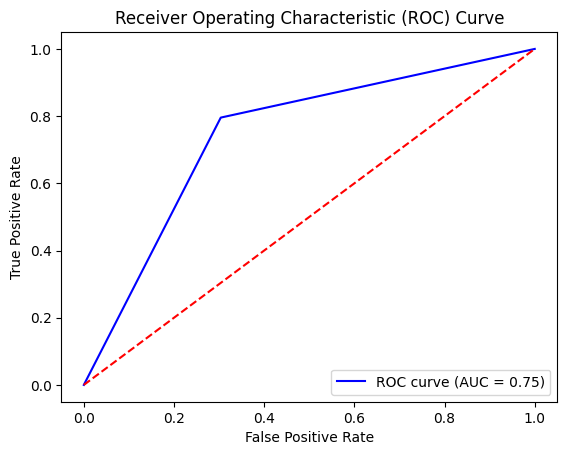

In [19]:
# Import relevant libraries
from sklearn.metrics import roc_curve, roc_auc_score

# y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig("figures/roc_curve.png", dpi=300)
plt.show()

In [20]:
# Create the Dash app
external_stylesheets = ['https://fonts.googleapis.com/css2?family=Open+Sans&display=swap']

app = dash.Dash(__name__)
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Define the layout of the dashboard
app.layout = html.Div(
#     style={'font-family': 'Open Sans'}, 
    children=[
    
    html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
    
    html.Div([
        html.H3('Exploratory Data Analysis'),
        html.Label('Feature 1 (X-axis)'),
        dcc.Dropdown(
            id='x_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[0]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    html.Div([
        html.Label('Feature 2 (Y-axis)'),
        dcc.Dropdown(
            id='y_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[1]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    dcc.Graph(id='correlation_plot'),
    
    # Wine quality prediction based on input feature values
    html.H3("Wine Quality Prediction"),
    html.Div([
        html.Label("Fixed Acidity"),
        dcc.Input(id='fixed_acidity', type='number', required=True),    
        html.Label("Volatile Acidity"),
        dcc.Input(id='volatile_acidity', type='number', required=True), 
        html.Label("Citric Acid"),
        dcc.Input(id='citric_acid', type='number', required=True),
        html.Br(),
        
        html.Label("Residual Sugar"),
        dcc.Input(id='residual_sugar', type='number', required=True),  
        html.Label("Chlorides"),
        dcc.Input(id='chlorides', type='number', required=True), 
        html.Label("Free Sulfur Dioxide"),
        dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
        html.Br(),
        
        html.Label("Total Sulfur Dioxide"),
        dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
        html.Label("Density"),
        dcc.Input(id='density', type='number', required=True),
        html.Label("pH"),
        dcc.Input(id='ph', type='number', required=True),
        html.Br(),
        
        html.Label("Sulphates"),
        dcc.Input(id='sulphates', type='number', required=True),
        html.Label("Alcohol"),
        dcc.Input(id='alcohol', type='number', required=True),
        html.Br(),
    ]),

    html.Div([
        html.Button('Predict', id='predict-button', n_clicks=0),
    ]),

    html.Div([
        html.H4("Predicted Quality"),
        html.Div(id='prediction-output')
    ])
])

# Define the callback to update the correlation plot
@app.callback(
    dash.dependencies.Output('correlation_plot', 'figure'),
    [dash.dependencies.Input('x_feature', 'value'),
     dash.dependencies.Input('y_feature', 'value')]
)
def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(data, x=x_feature, y=y_feature, color='quality')
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig

# Define the callback function to predict wine quality
@app.callback(
    Output(component_id='prediction-output', component_property='children'),
    [Input('predict-button', 'n_clicks')],
    [State('fixed_acidity', 'value'),
     State('volatile_acidity', 'value'),
     State('citric_acid', 'value'),
     State('residual_sugar', 'value'),
     State('chlorides', 'value'),
     State('free_sulfur_dioxide', 'value'),
     State('total_sulfur_dioxide', 'value'),
     State('density', 'value'),
     State('ph', 'value'),
     State('sulphates', 'value'),
     State('alcohol', 'value')]
)
def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                     chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol):
    # Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, 
                               free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)

    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]

    # Return the prediction
    if prediction == 1:
        return 'This wine is predicted to be good quality.'
    else:
        return 'This wine is predicted to be bad quality.'


# if __name__ == '__main__':
#     app.run_server(debug=False)

In [21]:
# sample_data = [9.1, 0.4, 0.5, 1.8, 0.071, 7.0, 16.0, 0.9946, 3.21, 0.69, 12.5]])